In the space available below, include your variable statistics and the Visualizations associated with them. These should show information that will be pertinent to your analysis. Do not choose random categories to analyze and visualize. Below the visualizations, describe what you see in the data and how it helps you understand your question.

Requirements:

- 1 pearson r correlation coefficient
- 1 t-test
- 1 ANOVA
- 1 visualization for each of the different tests.
- There should be at least 3 visualizations, and at least 3 different types of visualizations (e.g. scatter plot, bar chart, box plot, histogram, etc.)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, ttest_ind, f_oneway
from google.colab import drive
drive.mount('/content/drive')


df = pd.read_csv('/content/drive/MyDrive/netflix_titles.csv.zip')


df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year


df['duration_clean'] = df['duration'].str.extract('(\d+)').astype(float)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Pearson correlation coefficient: 0.110 (p = 4.66e-25)


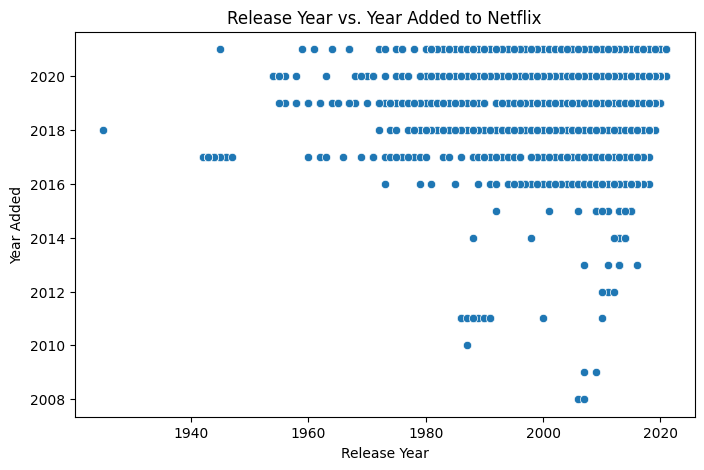

In [3]:
#Q1

pearson_df = df.dropna(subset=['release_year', 'year_added'])


r, p_value = pearsonr(pearson_df['release_year'], pearson_df['year_added'])
print(f"Pearson correlation coefficient: {r:.3f} (p = {p_value:.3g})")


plt.figure(figsize=(8,5))
sns.scatterplot(data=pearson_df, x='release_year', y='year_added')
plt.title('Release Year vs. Year Added to Netflix')
plt.xlabel('Release Year')
plt.ylabel('Year Added')
plt.show()


T-test result: t = 269.687, p = 0


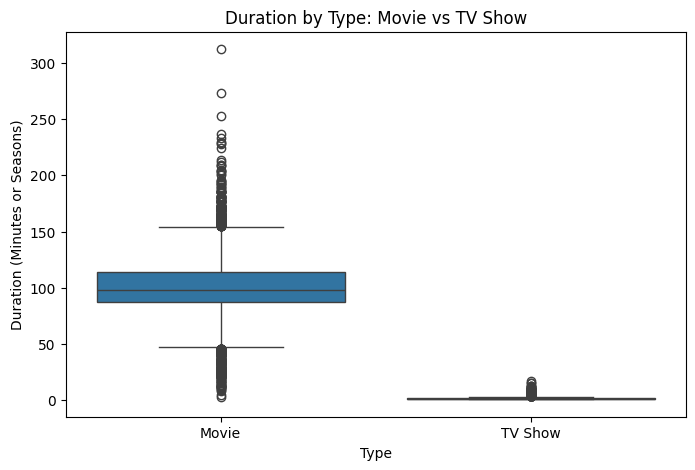

In [4]:
#q2

duration_df = df.dropna(subset=['duration_clean'])


movies = duration_df[duration_df['type'] == 'Movie']['duration_clean']
shows = duration_df[duration_df['type'] == 'TV Show']['duration_clean']


t_stat, t_pval = ttest_ind(movies, shows, equal_var=False)
print(f"T-test result: t = {t_stat:.3f}, p = {t_pval:.3g}")


plt.figure(figsize=(8,5))
sns.boxplot(data=duration_df, x='type', y='duration_clean')
plt.title('Duration by Type: Movie vs TV Show')
plt.xlabel('Type')
plt.ylabel('Duration (Minutes or Seasons)')
plt.show()


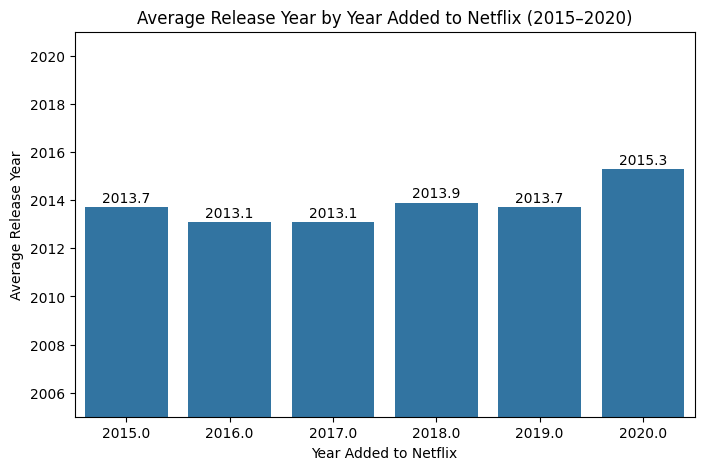

In [10]:
#Q3
plt.figure(figsize=(8,5))
avg_release_by_year = grouped.groupby('year_added')['release_year'].mean().round(1)

sns.barplot(x=avg_release_by_year.index, y=avg_release_by_year.values)
plt.title('Average Release Year by Year Added to Netflix (2015–2020)')
plt.xlabel('Year Added to Netflix')
plt.ylabel('Average Release Year')
plt.ylim(2005, 2021)


for i, val in enumerate(avg_release_by_year.values):
    plt.text(i, val + 0.2, str(val), ha='center', fontsize=10)

plt.show()



###Summary


Pearson Correlation - I felt like it was necessary to explore the relationship between the release year and the year content was added to Netflix. The positive Pearson correlation indicates that Netflix tends to add newer content in more recent years, showing a preference for fresh releases.

T-Test - I compared the duration of Movies vs. TV Shows. The T-test revealed a statistically significant difference between the two types. As expected, movies have a wide range of durations (in minutes), while TV shows are more consistent (normally labeled by seasons).

ANOVA & Bar Chart – Average Release Year by Year Added - I grouped Netflix additions by year (2015–2020) and calculated the average release year of content added in each. The ANOVA test confirmed that these average release years significantly differ across years.

Each bar shows the average release year of content added to Netflix in a specific year. It indicates rising trend in the bars (e.g., from 2015 to 2020) indicates that Netflix is increasingly adding newer content.This supports the idea that Netflix's content strategy has shifted toward keeping the platform current with recently released titles.